In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
import os

In [3]:
data_path = '/Users/harshitpatel/Desktop/python /pr/Assignment-2/DATA'

In [4]:
# Task 1: Locate EMG data and count the number of subjects
subjects = [d for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]
print(f'Number of subjects: {len(subjects)}')

Number of subjects: 4


Subject: sub1, Action: Normal, Files: ['Standing.txt', 'Waving.txt', 'Bowing.txt', 'Clapping.txt', 'Jumping.txt', 'Handshaking.txt', 'Running.txt', 'Seating.txt', 'Walking.txt', 'Hugging.txt']
Standing.txt - Shape: (9725, 8)


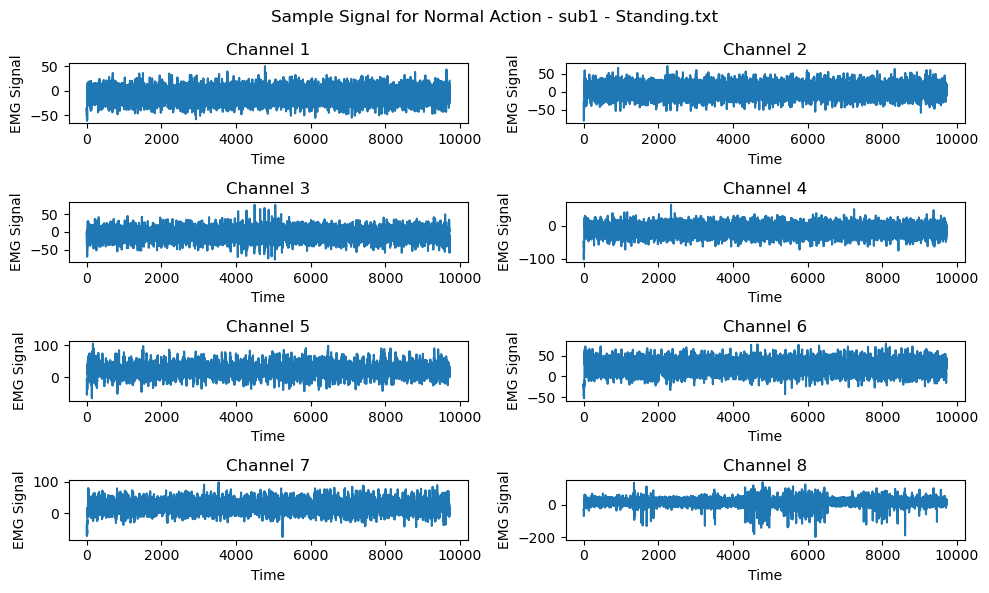

Subject: sub1, Action: Aggressive, Files: ['Hamering.txt', 'Pulling.txt', 'Frontkicking.txt', 'Pushing.txt', 'Elbowing.txt', 'Slapping.txt', 'Kneeing.txt', 'Punching.txt', 'Sidekicking.txt', 'Headering.txt']
Hamering.txt - Shape: (10000, 8)


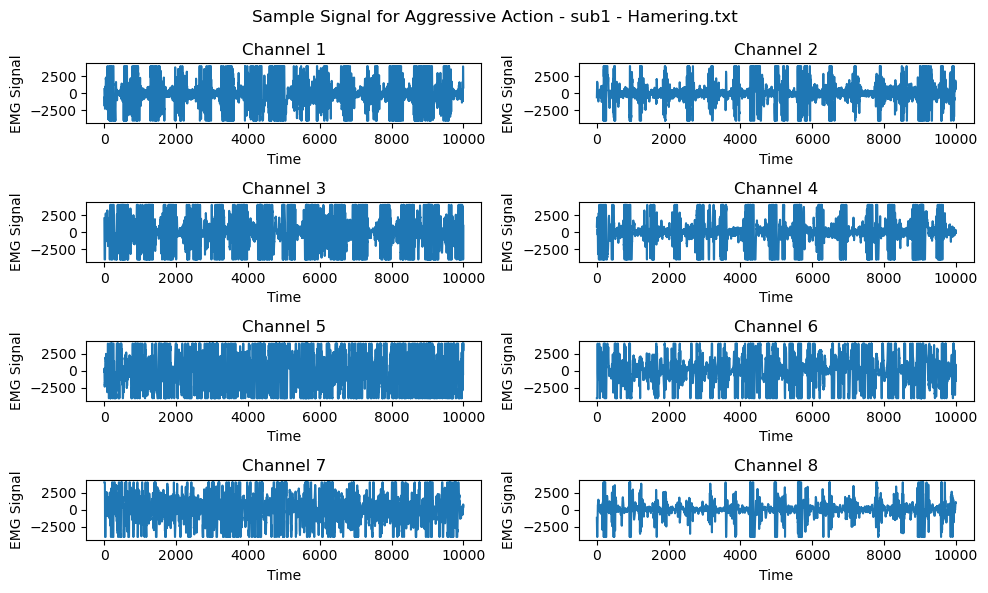

Subject: sub2, Action: Normal, Files: ['Standing.txt', 'Waving.txt', 'Bowing.txt', 'Clapping.txt', 'Jumping.txt', 'Handshaking.txt', 'Running.txt', 'Seating.txt', 'Walking.txt', 'Hugging.txt']
Standing.txt - Shape: (10000, 8)


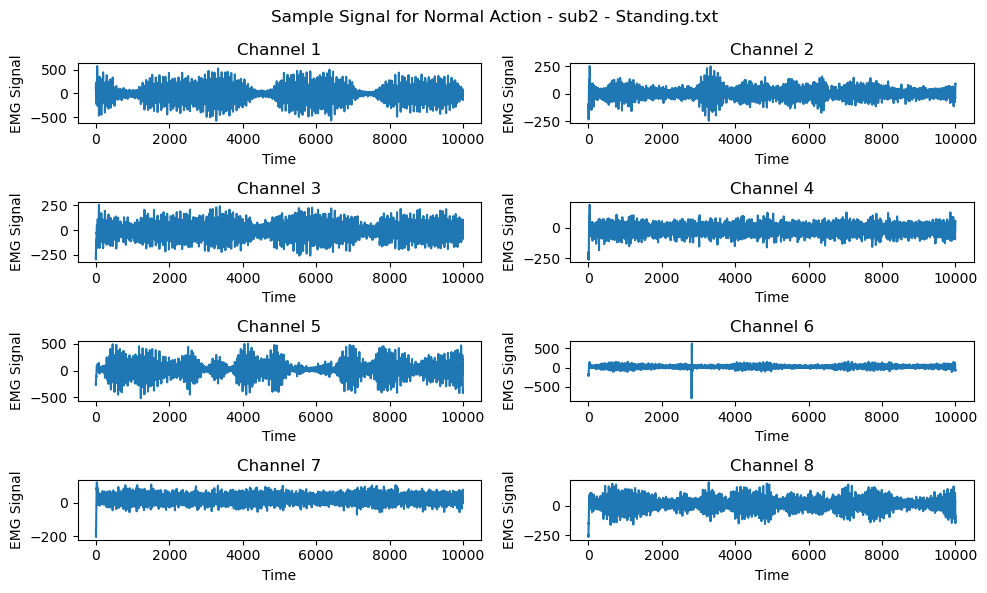

Subject: sub2, Action: Aggressive, Files: ['Hamering.txt', 'Pulling.txt', 'Frontkicking.txt', 'Pushing.txt', 'Elbowing.txt', 'Slapping.txt', 'Kneeing.txt', 'Punching.txt', 'Sidekicking.txt', 'Headering.txt']
Hamering.txt - Shape: (10000, 8)


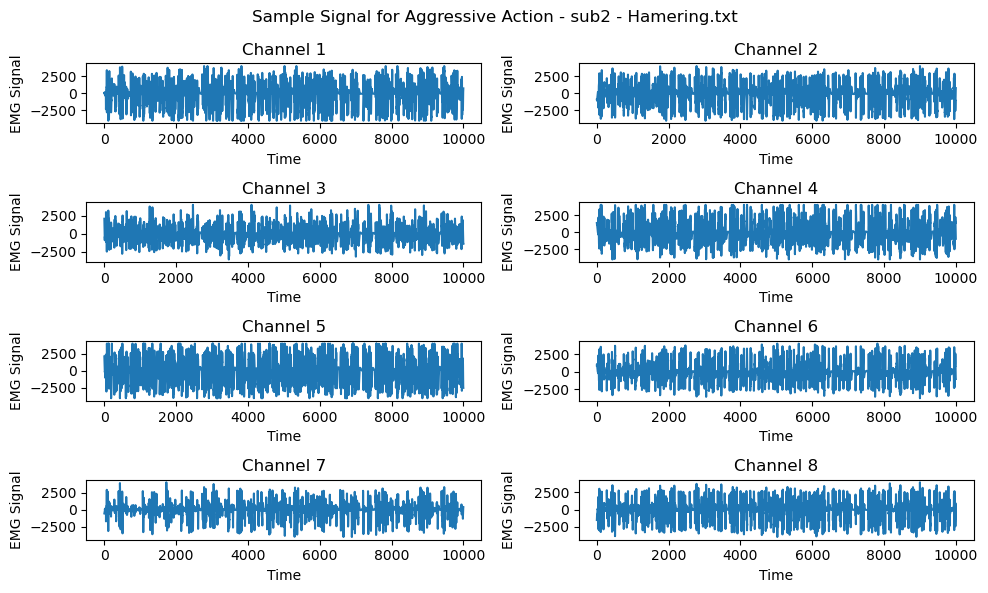

Subject: sub3, Action: Normal, Files: ['Standing.txt', 'Waving.txt', 'Bowing.txt', 'Clapping.txt', 'Jumping.txt', 'Handshaking.txt', 'Running.txt', 'Seating.txt', 'Walking.txt', 'Hugging.txt']
Standing.txt - Shape: (9604, 8)


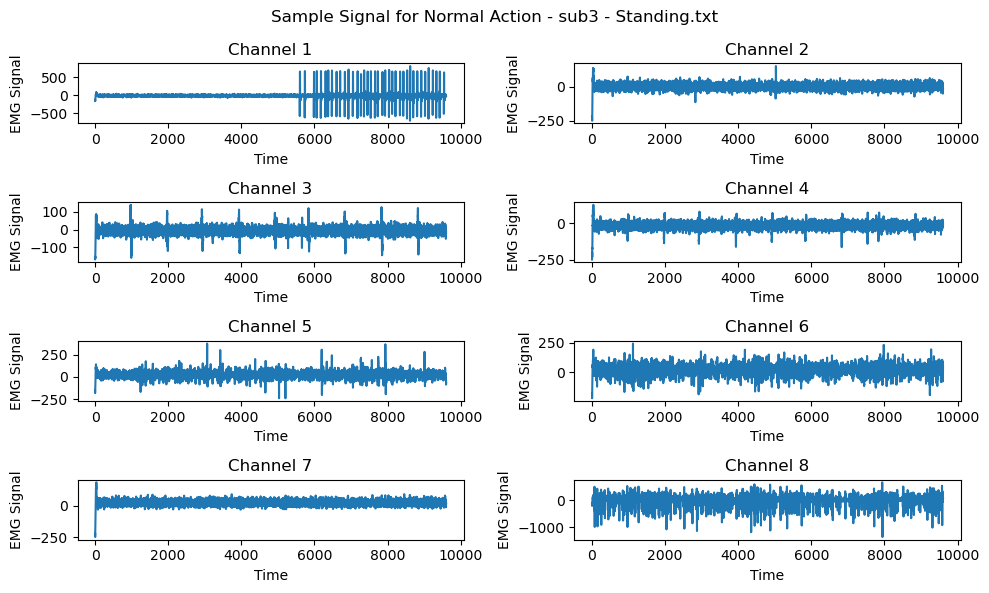

Subject: sub3, Action: Aggressive, Files: ['Hamering.txt', 'Pulling.txt', 'Frontkicking.txt', 'Pushing.txt', 'Elbowing.txt', 'Slapping.txt', 'Kneeing.txt', 'Punching.txt', 'Sidekicking.txt', 'Headering.txt']
Hamering.txt - Shape: (15106, 8)


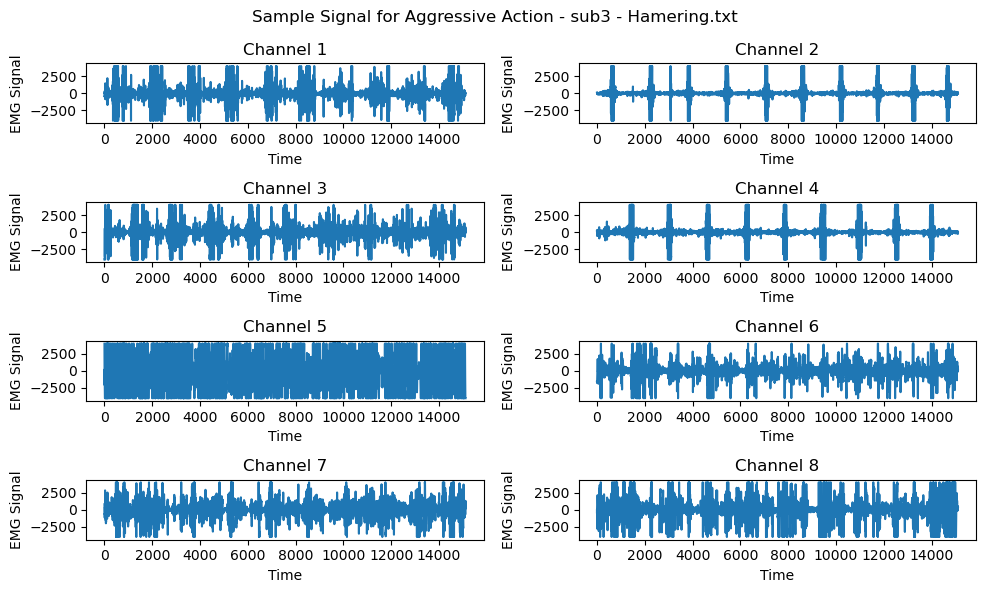

Subject: sub4, Action: Normal, Files: ['Standing.txt', 'Waving.txt', 'Bowing.txt', 'Clapping.txt', 'Jumping.txt', 'Handshaking.txt', 'Running.txt', 'Seating.txt', 'Walking.txt', 'Hugging.txt']
Standing.txt - Shape: (10000, 8)


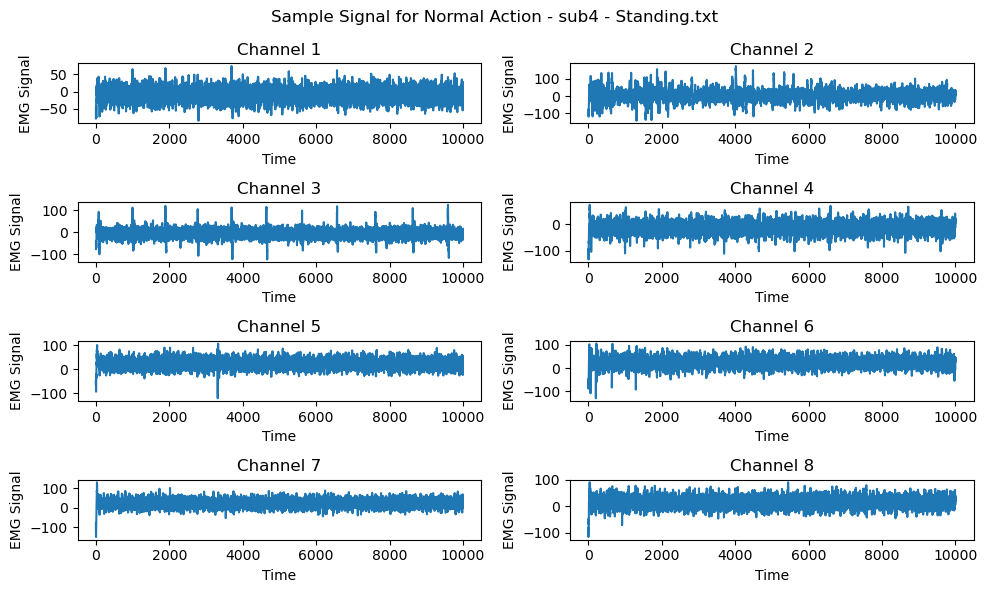

Subject: sub4, Action: Aggressive, Files: ['Hamering.txt', 'Pulling.txt', 'Frontkicking.txt', 'Pushing.txt', 'Elbowing.txt', 'Slapping.txt', 'Kneeing.txt', 'Punching.txt', 'Sidekicking.txt', 'Headering.txt']
Hamering.txt - Shape: (9550, 8)


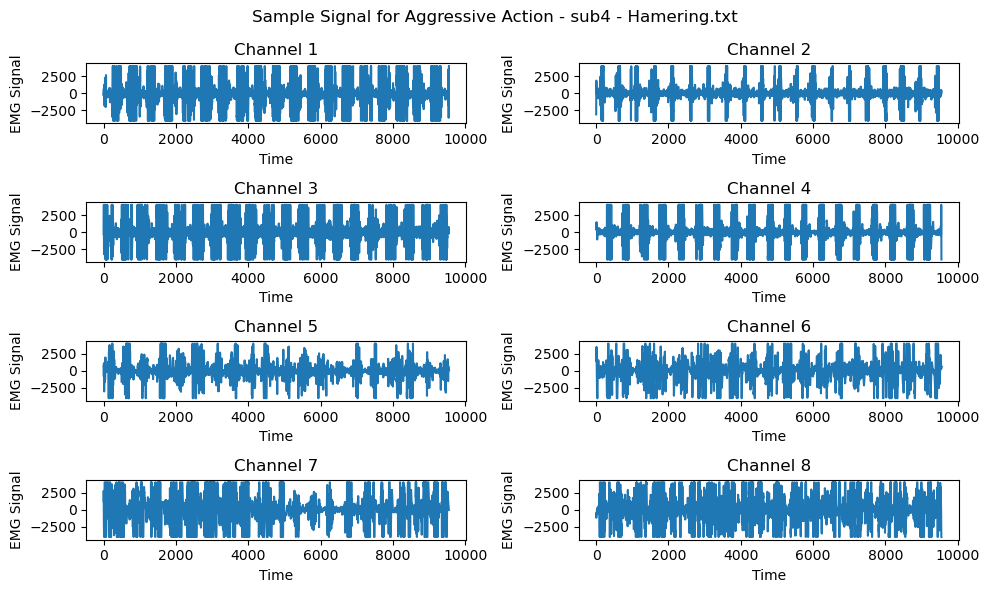

In [5]:
for subject in subjects:
    subject_path = os.path.join(data_path, subject)
    for action_type in ['Normal', 'Aggressive']:
        action_path = os.path.join(subject_path, action_type, 'txt')
        if os.path.exists(action_path):
            files = [f for f in os.listdir(action_path) if f.endswith('.txt')]
            print(f"Subject: {subject}, Action: {action_type}, Files: {files}")
            for file in files:
                file_path = os.path.join(action_path, file)
                signal_data = np.loadtxt(file_path)
                print(f"{file} - Shape: {signal_data.shape}")
                if action_type == 'Normal' or action_type == 'Aggressive':
                    plt.figure(figsize=(10, 6))
                    plt.suptitle(f"Sample Signal for {action_type} Action - {subject} - {file}")
                    channels = signal_data.shape[1] if len(signal_data.shape) > 1 else 1
                    for i in range( channels):
                        plt.subplot(4, 2, i + 1)
                        plt.plot(signal_data[:, i] if channels > 1 else signal_data)
                        plt.title(f"Channel {i + 1}")
                        plt.xlabel("Time")
                        plt.ylabel("EMG Signal")
                    
                    plt.tight_layout()
                    plt.show()
                    break

In [6]:

def load_data_from_structure(data_path):
    all_data = []
    
    # Traverse each subject folder
    for subject_index, subject in enumerate(os.listdir(data_path), start=1):
        subject_path = os.path.join(data_path, subject)
        
        # Check if the path is a directory
        if not os.path.isdir(subject_path):
            continue
        
        # Format subject name as sub1, sub2, etc.
        subject_name = f"sub{subject_index - 1}"
        
        # Traverse each action type folder within the subject folder
        for action_type in ['Normal', 'Aggressive']:
            action_path = os.path.join(subject_path, action_type, 'txt')
            
            # If the action folder exists, proceed
            if os.path.exists(action_path):
                # List all .txt files within the action folder
                files = [f for f in os.listdir(action_path) if f.endswith('.txt')]
                
                for file in files:
                    file_path = os.path.join(action_path, file)
                    
                    # Extract activity name from file name
                    activity_name = file.split('.')[0]  # Adjust if file naming convention changes
                    
                    # Load the data into a DataFrame
                    df = pd.read_csv(file_path, delimiter='\t', header=None)
                    
                    # Calculate how many rows to add to reach 10,000 rows
                    rows_to_add = 10000 - len(df)
                    
                    # Pad with zero rows if needed
                    if rows_to_add > 0:
                        zeroes_df = pd.DataFrame(0, index=range(rows_to_add), columns=df.columns)
                        df = pd.concat([df, zeroes_df], ignore_index=True)
                    
                    # Add the activity name, subject name, and action type as new columns
                    df['Activity'] = activity_name
                    df['Subject'] = subject_name
                    df['ActionType'] = action_type
                    
                    # Append the DataFrame to the list
                    all_data.append(df)
                    
    return all_data

 # Replace with your actual data path
all_data = load_data_from_structure(data_path)


In [7]:
original=all_data

In [8]:
all_data[79]

,0,1,2,3,4,5,6,7,Activity,Subject,ActionType
0,564,34,-107,-41,-7,904,33,359,Headering,sub4,Aggressive
1,504,21,-88,-66,-68,642,42,377,Headering,sub4,Aggressive
2,321,-21,-41,-50,-200,82,58,230,Headering,sub4,Aggressive
3,-52,-49,-40,-50,-341,-297,80,206,Headering,sub4,Aggressive
4,-315,-26,32,-46,-391,-554,-102,236,Headering,sub4,Aggressive
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,Headering,sub4,Aggressive
9996,0,0,0,0,0,0,0,0,Headering,sub4,Aggressive
9997,0,0,0,0,0,0,0,0,Headering,sub4,Aggressive
9998,0,0,0,0,0,0,0,0,Headering,sub4,Aggressive


In [9]:
trial_data = []

# Iterate over each DataFrame in all_data
for df in all_data:
    # Calculate the number of rows per trial
    rows_per_trial = len(df) // 15  # 667 rows for each trial
    
    # Split the DataFrame into 15 trials
    trials = [df.iloc[i * rows_per_trial : (i + 1) * rows_per_trial].reset_index(drop=True) for i in range(15)]
    
    # Add each trial DataFrame to the trial_data list
    trial_data.extend(trials)

# trial_data is now a list of DataFrames, each representing a single trial with 667 rows and 11 columns
# Example: trial_data[0] is the first trial, trial_data[1] the second, and so on

# Optional: To keep trials organized, you can add a `Trial` column indicating the trial number within each subject.
for i, trial in enumerate(trial_data, start=1):
    trial['Trial'] = i % 15 if i % 15 != 0 else 15

In [10]:
trial_data[0]

,0,1,2,3,4,5,6,7,Activity,Subject,ActionType,Trial
0,-40,-28,-16,-63,-7,-19,-39,-33,Standing,sub1,Normal,1
1,-35,-70,2,-46,-29,-24,-43,-35,Standing,sub1,Normal,1
2,-51,-76,-24,-68,-55,-18,-71,-25,Standing,sub1,Normal,1
3,-34,-56,-30,-102,-47,-48,-66,-68,Standing,sub1,Normal,1
4,-33,-80,-23,-83,-53,-29,-58,-29,Standing,sub1,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...
661,2,-6,-15,14,24,21,53,20,Standing,sub1,Normal,1
662,-5,-27,-8,-26,28,22,44,7,Standing,sub1,Normal,1
663,-8,16,12,-11,-11,45,54,-6,Standing,sub1,Normal,1
664,-24,5,-10,5,7,39,56,13,Standing,sub1,Normal,1


In [11]:
final_df = pd.concat(trial_data, ignore_index=True)
final_df

,0,1,2,3,4,5,6,7,Activity,Subject,ActionType,Trial
0,-40.0,-28.0,-16.0,-63.0,-7.0,-19.0,-39.0,-33.0,Standing,sub1,Normal,1
1,-35.0,-70.0,2.0,-46.0,-29.0,-24.0,-43.0,-35.0,Standing,sub1,Normal,1
2,-51.0,-76.0,-24.0,-68.0,-55.0,-18.0,-71.0,-25.0,Standing,sub1,Normal,1
3,-34.0,-56.0,-30.0,-102.0,-47.0,-48.0,-66.0,-68.0,Standing,sub1,Normal,1
4,-33.0,-80.0,-23.0,-83.0,-53.0,-29.0,-58.0,-29.0,Standing,sub1,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...
806230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Headering,sub4,Aggressive,15
806231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Headering,sub4,Aggressive,15
806232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Headering,sub4,Aggressive,15
806233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Headering,sub4,Aggressive,15


In [12]:
from scipy.stats import skew, kurtosis

In [13]:
def extract_features(segment):
    """
    Extract 20 time-domain features from a signal segment.
    """
    mean_val = np.mean(segment)
    median_val = np.median(segment)
    variance_val = np.var(segment)
    skewness_val = skew(segment)
    kurtosis_val = kurtosis(segment)
    rms_val = np.sqrt(np.mean(segment**2))
    mav_val = np.mean(np.abs(segment))
    se_val = np.sum(segment**2)
    zc_val = np.sum(np.diff(np.sign(segment)) != 0)
    '''sc_val = np.sum(np.diff(np.sign(np.diff(segment))) != 0)
    wamp_val = np.sum(np.abs(np.diff(segment)) > 0.02)  # Threshold can be adjusted
    aac_val = np.mean(np.abs(np.diff(segment)))
    logd_val = np.exp(np.mean(np.log(np.abs(segment) + 1e-6)))
    ssi_val = np.sum(segment**2)
    iemg_val = np.sum(np.abs(segment))'''

    # Add any additional feature extraction methods here if needed

    features=[mean_val, median_val, variance_val, skewness_val, kurtosis_val, rms_val,mav_val, se_val, zc_val]
    ''', sc_val, wamp_val, aac_val, logd_val, ssi_val, iemg_val'''
    

    return features

In [14]:
def segment_signal_and_extract_features(df, sensor_columns, Nseg):
    feature_dfs = []
    for df in trial_data:

        for i, column in enumerate(sensor_columns):
            signal = df[column].values  # Get the EMG signal from the DataFrame for the current sensor
            segment_length = len(signal) // Nseg
            feature_list = []

            for j in range(Nseg):
                segment = signal[j * segment_length : (j + 1) * segment_length]
                features = extract_features(segment)
                feature_list.append(features)

            sensor_feature_df = pd.DataFrame(
                feature_list,
                columns=[
                    f'mean_{i+1}', f'median_{i+1}', f'variance_{i+1}', f'skewness_{i+1}',
                    f'kurtosis_{i+1}', f'rms_{i+1}', f'mav_{i+1}', f'se_{i+1}', f'zc_{i+1}',
                    '''f'sc_{i+1}', f'wamp_{i+1}', f'aac_{i+1}', f'logd_{i+1}', f'ssi_{i+1}',
                    f'iemg_{i+1}''']
                
        )

        feature_dfs.append(sensor_feature_df)

    # Combine the features from all sensors
    combined_feature_df = pd.concat(feature_dfs, axis=1)

    return combined_feature_df

In [1]:
def extract_features(segment):
    """
    Extract 9 time-domain features from a signal segment.
    """
    mean_val = np.mean(segment)
    median_val = np.median(segment)
    variance_val = np.var(segment)
    skewness_val = skew(segment)
    kurtosis_val = kurtosis(segment)
    rms_val = np.sqrt(np.mean(segment**2))
    mav_val = np.mean(np.abs(segment))
    se_val = np.sum(segment**2)
    zc_val = np.sum(np.diff(np.sign(segment)) != 0)

    # Return the feature vector
    return [mean_val, median_val, variance_val, skewness_val, kurtosis_val, rms_val, mav_val, se_val, zc_val]

def segment_signal_and_extract_features(dataframes, sensor_columns, Nseg):
    """
    Process a list of EMG DataFrames:
    - Segment the data into Nseg segments per trial.
    - Extract features from each segment for each sensor column.
    - Extract corresponding activity labels for each segment.
    """
    all_features = []  # List to store feature DataFrames for all trials
    all_labels = []    # List to store activity labels for all trials

    for df in dataframes:
        feature_dfs = []  # Store features for all sensors in a trial
        labels = []       # Store activity labels for all segments

        segment_length = len(df) // Nseg
        activity_column = df["Activity"]  # Activity labels

        for segment_idx in range(Nseg):
            # Get the activity label for the current segment
            segment_labels = activity_column[segment_idx * segment_length:(segment_idx + 1) * segment_length]
            labels.append(segment_labels.mode()[0])  # Most common label in the segment

            # Extract features for each sensor column in the current segment
            segment_features = []
            for i, column in enumerate(sensor_columns):
                signal = df[column].values
                segment = signal[segment_idx * segment_length:(segment_idx + 1) * segment_length]
                features = extract_features(segment)
                segment_features.extend(features)  # Append features for all sensors in one row

            # Store features as a row
            feature_dfs.append(segment_features)

        # Combine features and labels for the current trial
        trial_feature_df = pd.DataFrame(
            feature_dfs,
            columns=[
                f'{stat}_ch{sensor_idx+1}'
                for sensor_idx in range(len(sensor_columns))
                for stat in ["mean", "median", "variance", "skewness", "kurtosis", "rms", "mav", "se", "zc"]
            ]
        )
        all_features.append(trial_feature_df)
        all_labels.extend(labels)

    # Combine features and labels across all trials
    combined_features = pd.concat(all_features, ignore_index=True)
    return combined_features, all_labels

# Function call
sensor_columns = [0, 1, 2, 3, 4, 5, 6, 7]  # Signal columns
# List of DataFrames
Nseg = 5  # Number of segments

# Extract features and labels
feature_df, labels = segment_signal_and_extract_features(trial_data, sensor_columns, Nseg)

# Outputs
print("Feature DataFrame:")
print(feature_df)


NameError: name 'trial_data' is not defined

In [16]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mean_ch1      5990 non-null   float64
 1   median_ch1    5990 non-null   float64
 2   variance_ch1  5990 non-null   float64
 3   skewness_ch1  5938 non-null   float64
 4   kurtosis_ch1  5938 non-null   float64
 5   rms_ch1       5990 non-null   float64
 6   mav_ch1       5990 non-null   float64
 7   se_ch1        5990 non-null   float64
 8   zc_ch1        6000 non-null   int64  
 9   mean_ch2      5990 non-null   float64
 10  median_ch2    5990 non-null   float64
 11  variance_ch2  5990 non-null   float64
 12  skewness_ch2  5938 non-null   float64
 13  kurtosis_ch2  5938 non-null   float64
 14  rms_ch2       5990 non-null   float64
 15  mav_ch2       5990 non-null   float64
 16  se_ch2        5990 non-null   float64
 17  zc_ch2        6000 non-null   int64  
 18  mean_ch3      5990 non-null 

In [17]:
def clean_features_and_labels(feature_df, labels):
    """
    Remove rows with NaN values from feature_df and update corresponding labels.
    """
    # Identify rows with NaN values
    nan_indices = feature_df[feature_df.isnull().any(axis=1)].index

    # Remove these rows from feature_df
    cleaned_feature_df = feature_df.dropna().reset_index(drop=True)

    # Remove corresponding labels
    cleaned_labels = [label for idx, label in enumerate(labels) if idx not in nan_indices]

    return cleaned_feature_df, cleaned_labels

# Example usage
cleaned_feature_df, cleaned_labels = clean_features_and_labels(feature_df, labels)

In [18]:
full_df=cleaned_feature_df
full_df['Labels']=cleaned_labels
full_df

,mean_ch1,median_ch1,variance_ch1,skewness_ch1,kurtosis_ch1,rms_ch1,mav_ch1,se_ch1,zc_ch1,mean_ch2,...,mean_ch8,median_ch8,variance_ch8,skewness_ch8,kurtosis_ch8,rms_ch8,mav_ch8,se_ch8,zc_ch8,Labels
0,-11.278195,-10.0,284.275991,-0.519764,-0.143373,20.284814,15.593985,54726.0,46,-0.007519,...,14.932331,19.0,6.012661e+02,-1.149571,1.621779,28.709591,24.511278,109624.0,17,Standing
1,-8.112782,-9.0,133.438408,0.231307,-0.876601,14.115794,11.962406,26501.0,37,4.593985,...,17.706767,19.0,2.750945e+02,-0.187597,0.079788,24.261576,20.112782,78287.0,35,Standing
2,-9.676692,-10.0,185.015773,0.005550,-0.316825,16.692937,13.766917,37061.0,35,3.977444,...,16.872180,18.0,2.116152e+02,0.012763,-0.602691,22.277471,18.466165,66006.0,24,Standing
3,-9.406015,-8.0,175.594550,0.069458,-0.714219,16.250159,13.225564,35121.0,48,2.902256,...,17.240602,16.0,2.520173e+02,0.402437,0.654967,23.436204,19.090226,73051.0,28,Standing
4,-7.849624,-8.0,193.360846,0.088667,-0.541238,15.968013,13.097744,33912.0,44,3.105263,...,16.909774,17.0,2.056159e+02,0.154580,-0.339064,22.171071,18.248120,65377.0,29,Standing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,38.345865,-62.0,707835.369099,0.701486,0.209159,842.202929,657.984962,94337668.0,14,17.233083,...,44.864662,-23.0,6.035188e+05,1.129198,3.346821,778.159111,533.977444,80535703.0,12,Headering
5934,-43.075188,-87.0,569522.941715,0.512269,0.749827,755.895769,559.556391,75993329.0,17,-16.060150,...,-8.270677,8.0,5.486561e+05,-0.130948,1.749278,740.759395,494.842105,72980356.0,19,Headering
5935,22.345865,0.0,51360.887896,1.570531,4.011008,227.728403,150.842105,6897410.0,24,25.225564,...,287.473684,287.0,2.848542e+06,-0.379070,0.607352,1712.069758,1218.706767,389847320.0,6,Headering
5936,9.165414,12.0,42555.145571,0.325377,2.548082,206.492495,139.586466,5671007.0,21,1.315789,...,250.872180,108.0,2.830173e+06,-0.038555,1.808458,1700.914270,1045.774436,384783544.0,9,Headering


In [19]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, LSTM, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [20]:
from itertools import combinations

In [21]:
# Helper function to create a neural network model
def create_nn_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [165]:
# Main evaluation function
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_class_combinations(X, y, model_type="rf", max_classes=19, monte_carlo_runs=10):
    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    accuracies = []
    num_classes_list = range(2, max_classes + 1)
    unique_labels = np.unique(y_encoded)

    for M in num_classes_list:
        combos = list(combinations(unique_labels, M))
        num_combos = len(combos)

        # Ensure monte_carlo_runs does not exceed num_combos
        actual_monte_carlo_runs = min(monte_carlo_runs, num_combos)
        print(f"For M={M} classes: {num_combos} combinations, using {actual_monte_carlo_runs} Monte Carlo runs.")

        sampled_combos = np.random.choice(num_combos, size=actual_monte_carlo_runs, replace=False)

        mc_accuracies = []
        for mc in sampled_combos:
            selected_classes = combos[mc]
            mask = np.isin(y_encoded, selected_classes)
            X_sampled, y_sampled = X[mask], y_encoded[mask]

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, stratify=y_sampled)

            # Initialize model
            if model_type == "rf":
                model = RandomForestClassifier()
            elif model_type == "xgb":
                model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
            elif model_type == "lgbm":
                model = LGBMClassifier()
            else:
                raise ValueError("Unsupported model type.")

            # Fit model and compute accuracy
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mc_accuracies.append(accuracy_score(y_test, y_pred))

        # Store the mean accuracy for the current number of classes
        accuracies.append(np.mean(mc_accuracies))

    return num_classes_list, accuracies'''


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

def evaluate_class_combinations(X, y, model_type="rf", max_classes=19, monte_carlo_runs=10, knn_neighbors=5):
    # Encode labels to integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    accuracies = []
    num_classes_list = range(2, max_classes + 1)
    unique_labels = np.unique(y_encoded)

    for M in num_classes_list:
        combos = list(combinations(unique_labels, M))
        num_combos = len(combos)

        # Ensure monte_carlo_runs does not exceed num_combos
        actual_monte_carlo_runs = min(monte_carlo_runs, num_combos)
        print(f"For M={M} classes: {num_combos} combinations, using {actual_monte_carlo_runs} Monte Carlo runs.")

        sampled_combos = np.random.choice(num_combos, size=actual_monte_carlo_runs, replace=False)

        mc_accuracies = []
        for mc in sampled_combos:
            selected_classes = combos[mc]
            mask = np.isin(y_encoded, selected_classes)
            X_sampled, y_sampled = X[mask], y_encoded[mask]

            # Train-test split
            X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, stratify=y_sampled)

            # Initialize model
            if model_type == "rf":
                model = RandomForestClassifier()
            elif model_type == "lgbm":
                model = LGBMClassifier()
            elif model_type == "knn":
                model = KNeighborsClassifier(n_neighbors=knn_neighbors)
            else:
                raise ValueError("Unsupported model type.")

            # Fit model and compute accuracy
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mc_accuracies.append(accuracy_score(y_test, y_pred))

        # Store the mean accuracy for the current number of classes
        accuracies.append(np.mean(mc_accuracies))

    return num_classes_list, accuracies


In [29]:
pd.DataFrame(cleaned_labels).value_counts()

Clapping        300
Bowing          299
Slapping        299
Waving          299
Punching        298
Pushing         298
Walking         298
Pulling         298
Hamering        297
Headering       297
Hugging         297
Jumping         297
Running         297
Handshaking     296
Sidekicking     296
Standing        296
Seating         295
Kneeing         294
Elbowing        294
Frontkicking    293
Name: count, dtype: int64

In [148]:
# Example: Encoding categorical features in the DataFrame
def preprocess_features(df):
    # Convert all object (string) columns to numerical
    for col in df.columns:
        if df[col].dtype == 'object':
            # For nominal data, use OneHotEncoder (or pd.get_dummies)
            # For ordinal data, use LabelEncoder
            encoder = LabelEncoder()
            df[col] = encoder.fit_transform(df[col])
    return df

# Preprocess the feature DataFrame
cleaned_feature_df = preprocess_features(cleaned_feature_df)

# Ensure labels are encoded as integers
label_encoder = LabelEncoder()
cleaned_labels = label_encoder.fit_transform(cleaned_labels)

In [28]:
print(f"Unique Labels: {np.unique(cleaned_labels)}")


Unique Labels: ['Bowing' 'Clapping' 'Elbowing' 'Frontkicking' 'Hamering' 'Handshaking'
 'Headering' 'Hugging' 'Jumping' 'Kneeing' 'Pulling' 'Punching' 'Pushing'
 'Running' 'Seating' 'Sidekicking' 'Slapping' 'Standing' 'Walking'
 'Waving']


In [30]:
cleaned_feature_df=cleaned_feature_df.drop(columns=['Labels'])


KeyError: "['Labels'] not found in axis"

In [31]:
cleaned_feature_df

,mean_ch1,median_ch1,variance_ch1,skewness_ch1,kurtosis_ch1,rms_ch1,mav_ch1,se_ch1,zc_ch1,mean_ch2,...,zc_ch7,mean_ch8,median_ch8,variance_ch8,skewness_ch8,kurtosis_ch8,rms_ch8,mav_ch8,se_ch8,zc_ch8
0,-11.278195,-10.0,284.275991,-0.519764,-0.143373,20.284814,15.593985,54726.0,46,-0.007519,...,17,14.932331,19.0,6.012661e+02,-1.149571,1.621779,28.709591,24.511278,109624.0,17
1,-8.112782,-9.0,133.438408,0.231307,-0.876601,14.115794,11.962406,26501.0,37,4.593985,...,8,17.706767,19.0,2.750945e+02,-0.187597,0.079788,24.261576,20.112782,78287.0,35
2,-9.676692,-10.0,185.015773,0.005550,-0.316825,16.692937,13.766917,37061.0,35,3.977444,...,18,16.872180,18.0,2.116152e+02,0.012763,-0.602691,22.277471,18.466165,66006.0,24
3,-9.406015,-8.0,175.594550,0.069458,-0.714219,16.250159,13.225564,35121.0,48,2.902256,...,18,17.240602,16.0,2.520173e+02,0.402437,0.654967,23.436204,19.090226,73051.0,28
4,-7.849624,-8.0,193.360846,0.088667,-0.541238,15.968013,13.097744,33912.0,44,3.105263,...,15,16.909774,17.0,2.056159e+02,0.154580,-0.339064,22.171071,18.248120,65377.0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,38.345865,-62.0,707835.369099,0.701486,0.209159,842.202929,657.984962,94337668.0,14,17.233083,...,13,44.864662,-23.0,6.035188e+05,1.129198,3.346821,778.159111,533.977444,80535703.0,12
5934,-43.075188,-87.0,569522.941715,0.512269,0.749827,755.895769,559.556391,75993329.0,17,-16.060150,...,7,-8.270677,8.0,5.486561e+05,-0.130948,1.749278,740.759395,494.842105,72980356.0,19
5935,22.345865,0.0,51360.887896,1.570531,4.011008,227.728403,150.842105,6897410.0,24,25.225564,...,10,287.473684,287.0,2.848542e+06,-0.379070,0.607352,1712.069758,1218.706767,389847320.0,6
5936,9.165414,12.0,42555.145571,0.325377,2.548082,206.492495,139.586466,5671007.0,21,1.315789,...,15,250.872180,108.0,2.830173e+06,-0.038555,1.808458,1700.914270,1045.774436,384783544.0,9


In [34]:
num_classes, acc_rf = evaluate_class_combinations(cleaned_feature_df.values, cleaned_labels, model_type="rf")
num_classes, acc_lgbm = evaluate_class_combinations(cleaned_feature_df.values, cleaned_labels, model_type="lgbm")
num_classes, acc_knn = evaluate_class_combinations(cleaned_feature_df.values, cleaned_labels, model_type="knn", knn_neighbors=5)

For M=2 classes: 190 combinations, using 10 Monte Carlo runs.
For M=3 classes: 1140 combinations, using 10 Monte Carlo runs.
For M=4 classes: 4845 combinations, using 10 Monte Carlo runs.
For M=5 classes: 15504 combinations, using 10 Monte Carlo runs.
For M=6 classes: 38760 combinations, using 10 Monte Carlo runs.
For M=7 classes: 77520 combinations, using 10 Monte Carlo runs.
For M=8 classes: 125970 combinations, using 10 Monte Carlo runs.
For M=9 classes: 167960 combinations, using 10 Monte Carlo runs.
For M=10 classes: 184756 combinations, using 10 Monte Carlo runs.
For M=11 classes: 167960 combinations, using 10 Monte Carlo runs.
For M=12 classes: 125970 combinations, using 10 Monte Carlo runs.
For M=13 classes: 77520 combinations, using 10 Monte Carlo runs.
For M=14 classes: 38760 combinations, using 10 Monte Carlo runs.
For M=15 classes: 15504 combinations, using 10 Monte Carlo runs.
For M=16 classes: 4845 combinations, using 10 Monte Carlo runs.
For M=17 classes: 1140 combinatio

In [175]:
acc_lgbm

[0.9991596638655462,
 1.0,
 1.0,
 1.0,
 0.9997183098591549,
 0.9997601918465229,
 0.9997899159663867,
 0.9994392484108537,
 0.9989896141398968,
 0.9996937205680944,
 0.9995798319327731,
 1.0,
 0.9996394227296583,
 0.9997754070038715,
 0.9996845423542154,
 1.0,
 0.9996259059475621,
 0.9999113475177305]

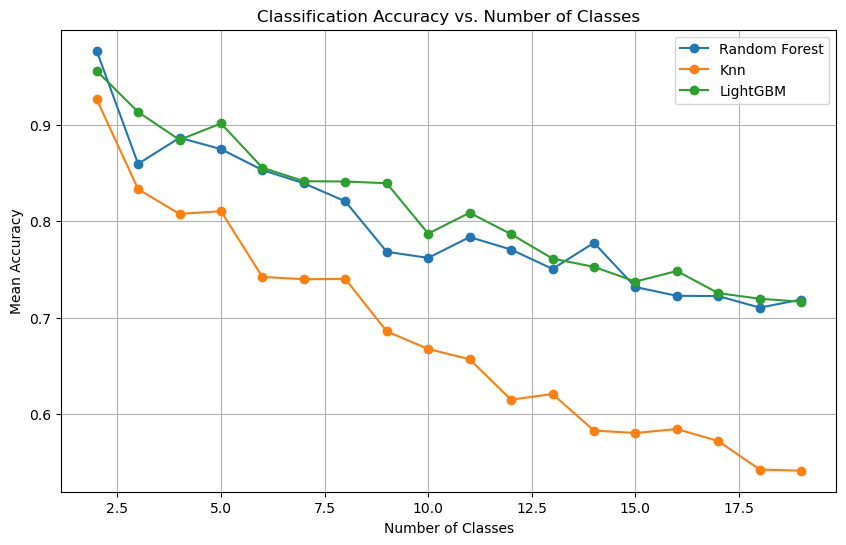

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(num_classes, acc_rf, label='Random Forest', marker='o')
plt.plot(num_classes, acc_knn, label='Knn', marker='o')
plt.plot(num_classes, acc_lgbm, label='LightGBM', marker='o')
plt.xlabel('Number of Classes')
plt.ylabel('Mean Accuracy')
plt.title('Classification Accuracy vs. Number of Classes')
plt.legend()
plt.grid()
plt.show()

In [111]:
def preprocess_data(features, labels):
    """
    Encode labels, split data, and standardize features.
    """
    le = LabelEncoder()
    encoded_labels = le.fit_transform(labels)
    
    X_train, X_test, y_train, y_test = train_test_split(
        features, encoded_labels, test_size=0.2, random_state=42
    )
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test, le

In [112]:
X_train, X_test, y_train, y_test, label_encoder = preprocess_data(cleaned_feature_df, cleaned_labels)


In [113]:
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    return scores.mean()

In [114]:
rf_model = RandomForestClassifier(random_state=42)
rf_cv_score = evaluate_model(rf_model, X_train, y_train)
rf_model.fit(X_train, y_train)
rf_accuracy = accuracy_score(y_test, rf_model.predict(X_test))

In [115]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_cv_score = evaluate_model(xgb_model, X_train, y_train)
xgb_model.fit(X_train, y_train)
xgb_accuracy = accuracy_score(y_test, xgb_model.predict(X_test))

/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:01:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:01:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:01:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:01:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/lib/python3.11/site-packa

In [116]:
lgb_model = LGBMClassifier(random_state=42)
lgb_cv_score = evaluate_model(lgb_model, X_train, y_train)
lgb_model.fit(X_train, y_train)
lgb_accuracy = accuracy_score(y_test, lgb_model.predict(X_test))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16710
[LightGBM] [Info] Number of data points in the train set: 3800, number of used features: 72
[LightGBM] [Info] Start training from score -2.969757
[LightGBM] [Info] Start training from score -3.017010
[LightGBM] [Info] Start training from score -3.049799
[LightGBM] [Info] Start training from score -3.001009
[LightGBM] [Info] Start training from score -3.022401
[LightGBM] [Info] Start training from score -3.027821
[LightGBM] [Info] Start training from score -2.954489
[LightGBM] [Info] Start training from score -3.033270
[LightGBM] [Info] Start training from score -2.980066
[LightGBM] [Info] Start training from score -2.974898
[LightGBM] [Info] Start training from score -2.969757
[LightGBM] [Info] Start training from score -2.974898
[LightGBM] [Info] Start training from score -2.974898
[LightGBM

In [117]:
def create_cnn(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [118]:
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

cnn_model = create_cnn(X_train_cnn.shape[1:], len(np.unique(y_train)))
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)[1]

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2038 - loss: 2.4994
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3974 - loss: 1.7818
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4748 - loss: 1.5697
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5066 - loss: 1.4192
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5568 - loss: 1.2867
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5588 - loss: 1.2502
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5903 - loss: 1.1606
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6008 - loss: 1.1170
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6155 - loss: 1.0586
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6378 - loss: 1.0371


In [119]:
def create_lstm(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(64),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm(X_train_cnn.shape[1:], len(np.unique(y_train)))
lstm_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, verbose=1)
lstm_accuracy = lstm_model.evaluate(X_test_cnn, y_test, verbose=0)[1]

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.0890 - loss: 2.7855
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1355 - loss: 2.4929
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1599 - loss: 2.3921
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.1861 - loss: 2.3258
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2184 - loss: 2.2708
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2376 - loss: 2.1437
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2784 - loss: 2.0851
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.2908 - loss: 2.0296
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3335 - loss: 1.9100
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.3384 - loss: 1.8407


In [120]:
print("Model Evaluation Results (Boosting and Begging Techniques and Neural Networks):")
print(f"Random Forest: CV Score = {rf_cv_score:.4f}, Accuracy = {rf_accuracy:.4f}")
print(f"XGBoost: CV Score = {xgb_cv_score:.4f}, Accuracy = {xgb_accuracy:.4f}")
print(f"LightGBM: CV Score = {lgb_cv_score:.4f}, Accuracy = {lgb_accuracy:.4f}")
print(f"CNN: Accuracy = {cnn_accuracy:.4f}")
print(f"LSTM: Accuracy = {lstm_accuracy:.4f}")

Model Evaluation Results (Boosting and Begging Techniques and Neural Networks):
Random Forest: CV Score = 0.6901, Accuracy = 0.7239
XGBoost: CV Score = 0.6775, Accuracy = 0.6978
LightGBM: CV Score = 0.6947, Accuracy = 0.7146
CNN: Accuracy = 0.6027
LSTM: Accuracy = 0.3763


In [121]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [122]:
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Train a model, perform cross-validation, and evaluate on test data.
    """
    # Cross-validation
    cv_score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()
    
    # Train model
    model.fit(X_train, y_train)
    
    # Test accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    
    return cv_score, test_accuracy

In [123]:
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42)

In [124]:
svm_cv, svm_acc = train_and_evaluate_model(svm_model, X_train, X_test, y_train, y_test)
knn_cv, knn_acc = train_and_evaluate_model(knn_model, X_train, X_test, y_train, y_test)
logreg_cv, logreg_acc = train_and_evaluate_model(logreg_model, X_train, X_test, y_train, y_test)
mlp_cv, mlp_acc = train_and_evaluate_model(mlp_model, X_train, X_test, y_train, y_test)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_

In [126]:
print("Model Evaluation Results od machine learning and clustering algo:")
print(f"SVM: CV Score = {svm_cv:.4f}, Accuracy = {svm_acc:.4f}")
print(f"KNN: CV Score = {knn_cv:.4f}, Accuracy = {knn_acc:.4f}")
print(f"Logistic Regression: CV Score = {logreg_cv:.4f}, Accuracy = {logreg_acc:.4f}")
print(f"MLP Classifier: CV Score = {mlp_cv:.4f}, Accuracy = {mlp_acc:.4f}")

Model Evaluation Results od machine learning and clustering algo:
SVM: CV Score = 0.5798, Accuracy = 0.6002
KNN: CV Score = 0.5352, Accuracy = 0.5623
Logistic Regression: CV Score = 0.5128, Accuracy = 0.5505
MLP Classifier: CV Score = 0.6061, Accuracy = 0.6296


Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.1435 - loss: 2.6436 - val_accuracy: 0.1105 - val_loss: 2.8409
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2761 - loss: 2.0302 - val_accuracy: 0.1453 - val_loss: 2.8194
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3357 - loss: 1.8498 - val_accuracy: 0.2242 - val_loss: 2.3172
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.3842 - loss: 1.7525 - val_accuracy: 0.4179 - val_loss: 1.6647
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4336 - loss: 1.6351 - val_accuracy: 0.4389 - val_loss: 1.5992
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.4425 - loss: 1.5790 - val_accuracy: 0.4474 - val_loss: 1.5556
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4737 - loss: 1.4809 - val_accuracy: 0.4684 - val_loss: 1.5088
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4979 - loss: 1.4447 - val_accuracy: 0.488

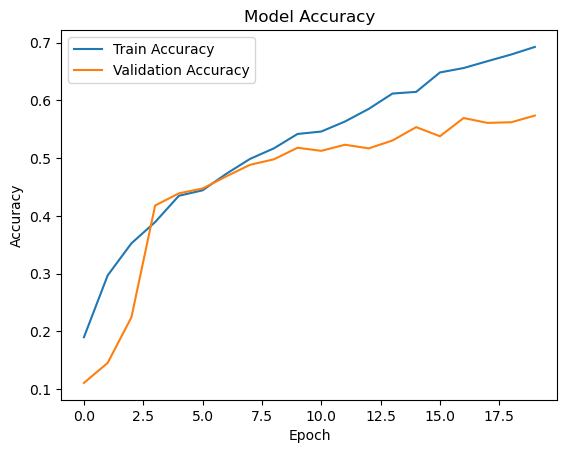

In [127]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Flatten, Dense, Dropout, BatchNormalization

# Ensure you have preprocessed `X_train`, `X_test`, `y_train`, and `y_test`.

# Reshape data for Conv1D and LSTM (add channel dimension)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Get the number of classes
num_classes = len(np.unique(y_train)) 

# Define DeepConvLSTM Model
def create_deepconv_lstm(input_shape, num_classes):
    model = Sequential([
        # Convolutional layers
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        Conv1D(filters=128, kernel_size=3, activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),
        Dropout(0.3),

        # LSTM layers
        LSTM(128, return_sequences=True),
        LSTM(128),

        # Fully connected layers
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    # Compile model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model

# Initialize the model
deepconv_lstm_model = create_deepconv_lstm(X_train_reshaped.shape[1:], num_classes)

# Train the model
history = deepconv_lstm_model.fit(
    X_train_reshaped, y_train,
    epochs=20,  # Adjust epochs based on dataset size and computational resources
    batch_size=32,
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1
)

# Evaluate the model
test_loss, test_accuracy = deepconv_lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)

print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
